In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
standard = pd.read_csv('standardbatting.csv', float_precision = 'round_trip')
# pandas sacrifices decimal accuracy for speed on .csv file read-in's, so using float_precision = 'round_trip'
# will read in accurate decimals, which is important for our project

In [14]:
standard.head()

,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,2001,Anaheim Angels,38.0,27.90,4.27,162.0,6226.0,5551.0,691.0,1447.0,...,0.405,0.732,91.0,2248.0,109.0,77.0,46.0,53.0,34.0,1203
1,2001,Arizona Diamondbacks,31.9,5.05,162.00,6349.0,5595.0,818.0,1494.0,284.0,...,0.783,94.000,2472.0,105.0,57.0,71.0,36.0,73.0,1183.0,47
2,2001,Atlanta Braves,4.5,162.00,6152.00,5498.0,729.0,1432.0,263.0,24.0,...,87.000,2265.000,132.0,45.0,64.0,52.0,51.0,1095.0,46.0,30.2
3,2001,Baltimore Orioles,162.0,6151.00,5472.00,687.0,1359.0,262.0,24.0,136.0,...,2077.000,121.000,77.0,38.0,49.0,26.0,1106.0,48.0,30.0,4.80
4,2001,Boston Red Sox,6264.0,5605.00,772.00,1493.0,316.0,29.0,198.0,739.0,...,132.000,70.000,28.0,41.0,50.0,1161.0,43.0,30.7,4.8,162


In [15]:
standard.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    630 non-null    int64  
 1   Tm      630 non-null    object 
 2   #Bat    630 non-null    float64
 3   BatAge  630 non-null    float64
 4   R/G     630 non-null    float64
 5   G       630 non-null    float64
 6   PA      630 non-null    float64
 7   AB      630 non-null    float64
 8   R       630 non-null    float64
 9   H       630 non-null    float64
 10  2B      630 non-null    float64
 11  3B      630 non-null    float64
 12  HR      630 non-null    float64
 13  RBI     630 non-null    float64
 14  SB      630 non-null    float64
 15  CS      630 non-null    float64
 16  BB      630 non-null    float64
 17  SO      630 non-null    float64
 18  BA      630 non-null    float64
 19  OBP     630 non-null    float64
 20  SLG     630 non-null    float64
 21  OPS     630 non-null    float64
 22  OP

In [16]:
# remove data from 2020
print(standard.shape)
standard = standard.loc[standard.Year != 2020, ]
print(standard.shape) # rows went from 660 to 630

(630, 30)
(600, 30)


In [17]:
import matplotlib.pyplot as plt


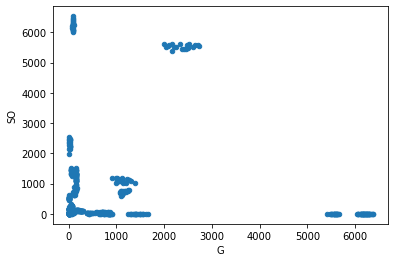

In [20]:
standard.plot.scatter('G', 'SO') # Home runs vs runs batted in
plt.show()

In [ ]:
# ideas of graphs to make for Exploratory Data Analysis
# 1. 
# 2. 

### Visualization 1: Line Plot

[Text(0.5, 1.0, 'Runs scored per game 2000-2020')]

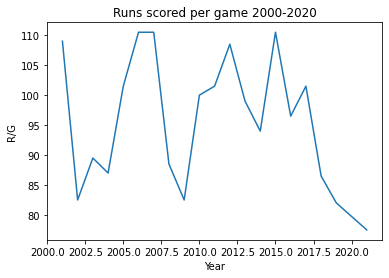

In [26]:
#Average runs scored per game grouped by Year
runs = standard.groupby('Year')['R/G'].median()
sns.lineplot(data = runs).set(title = "Runs scored per game 2000-2020")
#Average runs scored per game goes up and down depending on the year

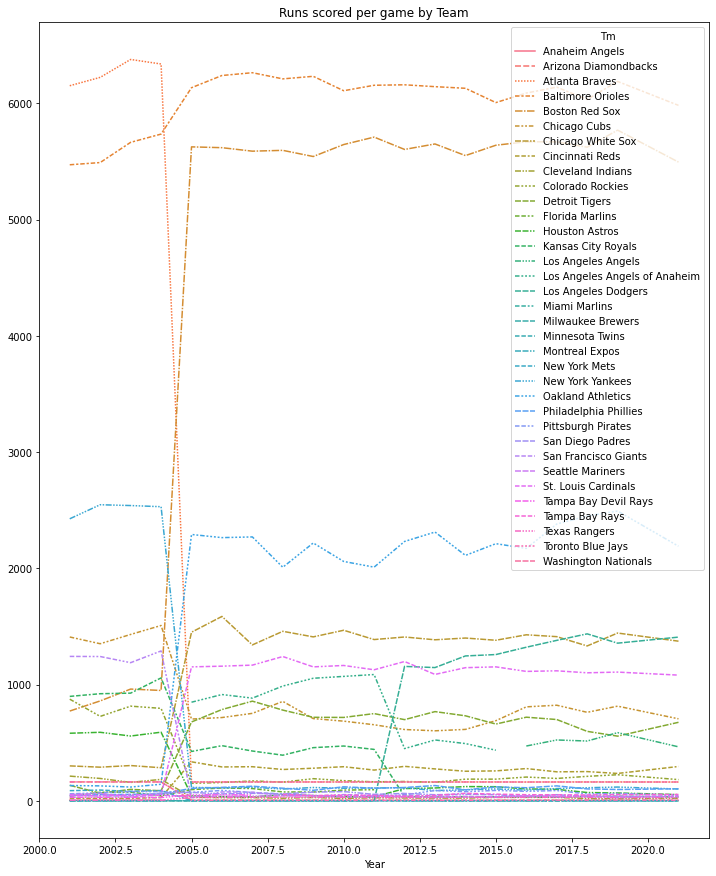

In [31]:
runsscore = standard.pivot("Year", "Tm", "R/G")

fig = plt.figure(figsize = (12,15))

fig = sns.lineplot(data = runsscore).set(title = "Runs scored per game by Team")